In [35]:
## start
#print("Hello, World!")

In [ ]:
# Import packages
import os
from datetime import datetime
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
import seaborn as sns

import re

from birdnetlib import Recording
from birdnetlib.analyzer import Analyzer

import sqlite3

#import pyarrow.parquet as pq # https://arrow.apache.org/docs/python/parquet.html #error on install

import sys
print(sys.executable)


/opt/anaconda3/envs/nt_bird_detect_conda_env_20251206/bin/python


In [ ]:
home_dir = os.path.expanduser('~')
#recordings_directory_path = os.path.join(home_dir, 'Documents/MyProjects/NatureThrive', '20251122_Recordings/Data') #154 files
#recordings_directory_path = os.path.join(home_dir, 'Documents/MyProjects/NatureThrive', '20250907_Recordings/Data') #176 files
recordings_directory_path = os.path.join(home_dir, 'Documents/MyProjects/NatureThrive', '20251209_trials_5_recordings/Data') # 5 files
parquet_file_path = os.path.join(home_dir, 'Documents/MyProjects/NatureThrive', 'recordings_parquet/recordings_20251212.parquet') # parquet file


entries = sorted(os.listdir(recordings_directory_path))

# Initialize the BirdNET-Analyzer.
analyzer = Analyzer()

error_files = []
counter_files = 0
for file in entries:
    counter_files += 1
    if not file.lower().endswith('.wav'): continue # skip non-wav files
    directory_path_file = os.path.join(recordings_directory_path, file)
    print(f"Analyzing file number {counter_files}: {file}")
    file_date = file[9:17]
    file_time = file[18:24]
    file_year = int(file[9:13])
    file_month = int(file[13:15])
    file_day = int(file[15:17])
    print(f"Date: {file_date}, Time: {file_time}, Year: {file_year}, Month: {file_month}, Day: {file_day}")

    recording = Recording(
        analyzer,
        directory_path_file,
        lat=50.9481,
        lon=-3.2503,
        date=datetime(year=file_year, month=file_month, day=file_day),  # use date or week_48
        min_conf=0.01,
    )
    
    print(f"Analyzing file: {file}")
    try:
        recording.analyze()
    except Exception as e:
        error_files.append(file) # append errored file name to error list
        print(f"Error analyzing file {file}: {e}")
        continue

    #print("Load data into DataFrame")
    df_recordings_results = pd.DataFrame(recording.detections)

    # Add file name and date columns to DataFrame
    df_recordings_results['file_name'] = file
    df_recordings_results['file_date'] = file_date
    df_recordings_results['file_time'] = file_time

    #print("If Parquet file exists, read it and concatenate, else use current DataFrame")
    if os.path.exists(parquet_file_path):
        df_stored_recordings = pd.read_parquet(parquet_file_path)
        #print("Combine both DataFrames")
        df_combined = pd.concat([df_stored_recordings, df_recordings_results], ignore_index=True)
        df = df_combined
    else:
        df = df_recordings_results

    # Save the DataFrame to a Parquet file
    # index=False tells Pandas NOT to save the row indices (0, 1, 2...) as a column
    #print("Save combined DataFrame back to Parquet")
    try:
        df.to_parquet(parquet_file_path, index=False)
    except ImportError:
        print("Error: Failed to save DataFrame to Parquet")


    #print(directory_path_file)
    #print(file_date, file_time, file_year, file_month, file_day)







Labels loaded.
load model True
Model loaded.
Labels loaded.
load_species_list_model


INFO: Applying 1 TensorFlow Lite delegate(s) lazily.
VERBOSE: XNNPack weight cache not enabled.
VERBOSE: Replacing 245 out of 376 node(s) with delegate (TfLiteXNNPackDelegate) node, yielding 40 partitions for the whole graph.
INFO: Successfully applied the default TensorFlow Lite delegate indexed at 0.
 *NOTE*: because a delegate has been applied, the precision of computations should be unchanged, but the exact output tensor values may have changed. If such output values are checked in your code, like in your tests etc., please consider increasing error tolerance for the check.
INFO: Applying 1 TensorFlow Lite delegate(s) lazily.
VERBOSE: XNNPack weight cache not enabled.
VERBOSE: Replacing 39 out of 56 node(s) with delegate (TfLiteXNNPackDelegate) node, yielding 7 partitions for the whole graph.
INFO: Successfully applied the default TensorFlow Lite delegate indexed at 0.
 *NOTE*: because a delegate has been applied, the precision of computations should be unchanged, but the exact out

Meta model loaded.
Analyzing file number 1: S4A27301_20250917_103013.wav
Date: 20250917, Time: 103013, Year: 2025, Month: 9, Day: 17
Analyzing file: S4A27301_20250917_103013.wav
read_audio_data

Error analyzing file S4A27301_20250917_103013.wav: Audio format could not be opened.
Analyzing file number 2: S4A27301_20250917_161252.wav
Date: 20250917, Time: 161252, Year: 2025, Month: 9, Day: 17
Analyzing file: S4A27301_20250917_161252.wav
read_audio_data
read_audio_data: complete, read  1199 chunks.
analyze_recording S4A27301_20250917_161252.wav
recording has lon/lat
set_predicted_species_list_from_position
return_predicted_species_list
35
141 species loaded.
Analyzing file number 3: S4A27301_20250917_171252.wav
Date: 20250917, Time: 171252, Year: 2025, Month: 9, Day: 17
Analyzing file: S4A27301_20250917_171252.wav
read_audio_data
read_audio_data: complete, read  199 chunks.
analyze_recording S4A27301_20250917_171252.wav
recording has lon/lat
set_predicted_species_list_from_position
Analyz

In [27]:
home_dir = os.path.expanduser('~')
recordings_directory_path = os.path.join(home_dir, 'Documents/MyProjects/NatureThrive', '20251122_Recordings/Data') #154 files
#recordings_directory_path = os.path.join(home_dir, 'Documents/MyProjects/NatureThrive', '20250907_Recordings/Data') #176 files
#recordings_directory_path = os.path.join(home_dir, 'Documents/MyProjects/NatureThrive', '20251209_trials_5_recordings/Data') # 5 files
parquet_file_path = os.path.join(home_dir, 'Documents/MyProjects/NatureThrive', 'recordings_parquet/recordings_20251211.parquet') # parquet file

df_stored_recordings = pd.read_parquet(parquet_file_path)
df_stored_recordings.head()

df_stored_recordings.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1015483 entries, 0 to 1015482
Data columns (total 9 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   common_name      1015483 non-null  object 
 1   scientific_name  1015483 non-null  object 
 2   start_time       1015483 non-null  float64
 3   end_time         1015483 non-null  float64
 4   confidence       1015483 non-null  float64
 5   label            1015483 non-null  object 
 6   file_name        1015483 non-null  object 
 7   file_date        1015483 non-null  object 
 8   file_time        1015483 non-null  object 
dtypes: float64(3), object(6)
memory usage: 69.7+ MB


In [ ]:

home_dir = os.path.expanduser('~')
parquet_file_path = os.path.join(home_dir, 'Documents/MyProjects/NatureThrive', 'recordings_parquet/recordings_20251211.parquet') # parquet file
#csv_file_path = os.path.join(home_dir, 'Documents/MyProjects/NatureThrive', 'recordings_tocsv/recordings_date_bird_callcounts_20251212.csv') # csv file
#csv_file_path = os.path.join(home_dir, 'Documents/MyProjects/NatureThrive', 'recordings_tocsv/recordings_date_time_callcounts_20251212.csv') # csv file

df_stored_recordings = pd.read_parquet(parquet_file_path)

#df_stored_recordings.head(20)

# bird, count
# df = df_stored_recordings[df_stored_recordings["confidence"]>0.75].groupby("label").agg(counts=("scientific_name","count")).sort_values(by="counts", ascending=False).reset_index()
# 88 rows, where confidence > 0.5
# df_stored_recordings.groupby("label").agg(counts=("scientific_name","count")).sort_values(by="counts", ascending=False)
# 140 rows, where confidence > 0.01

# date, bird, count, confidence > 0.75
#df = df_stored_recordings[df_stored_recordings["confidence"]>0.75].groupby(by=["file_date","label"]).agg(call_counts=("scientific_name","count")).sort_values(by=["file_date","call_counts"], ascending=[True,False]).reset_index()

# date, time
df = df_stored_recordings[df_stored_recordings["confidence"]>0.75].groupby(by=["file_date","file_time"]).agg(call_counts=("scientific_name","count")).sort_values(by=["file_date","call_counts"], ascending=[True,False]).reset_index()

print(df)

# export data to csv
#df.to_csv(csv_file_path, index=False)  
#print(df)




    file_date file_time  call_counts
0    20250818    141329           42
1    20250818    151323           24
2    20250818    171323           16
3    20250917    161252          141
4    20250917    171252           23
..        ...       ...          ...
143  20250929    081002          126
144  20250929    121002          122
145  20250929    131002          110
146  20250929    101003           83
147  20250929    111002           58

[148 rows x 3 columns]


/var/folders/mf/7g4_hnrj2ws75zhpp34jrc_80000gn/T/ipykernel_58798/1795643853.py:30: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout(rect=[0, 0, 0.85, 1]) # Adjust layout to ensure the legend fits fully


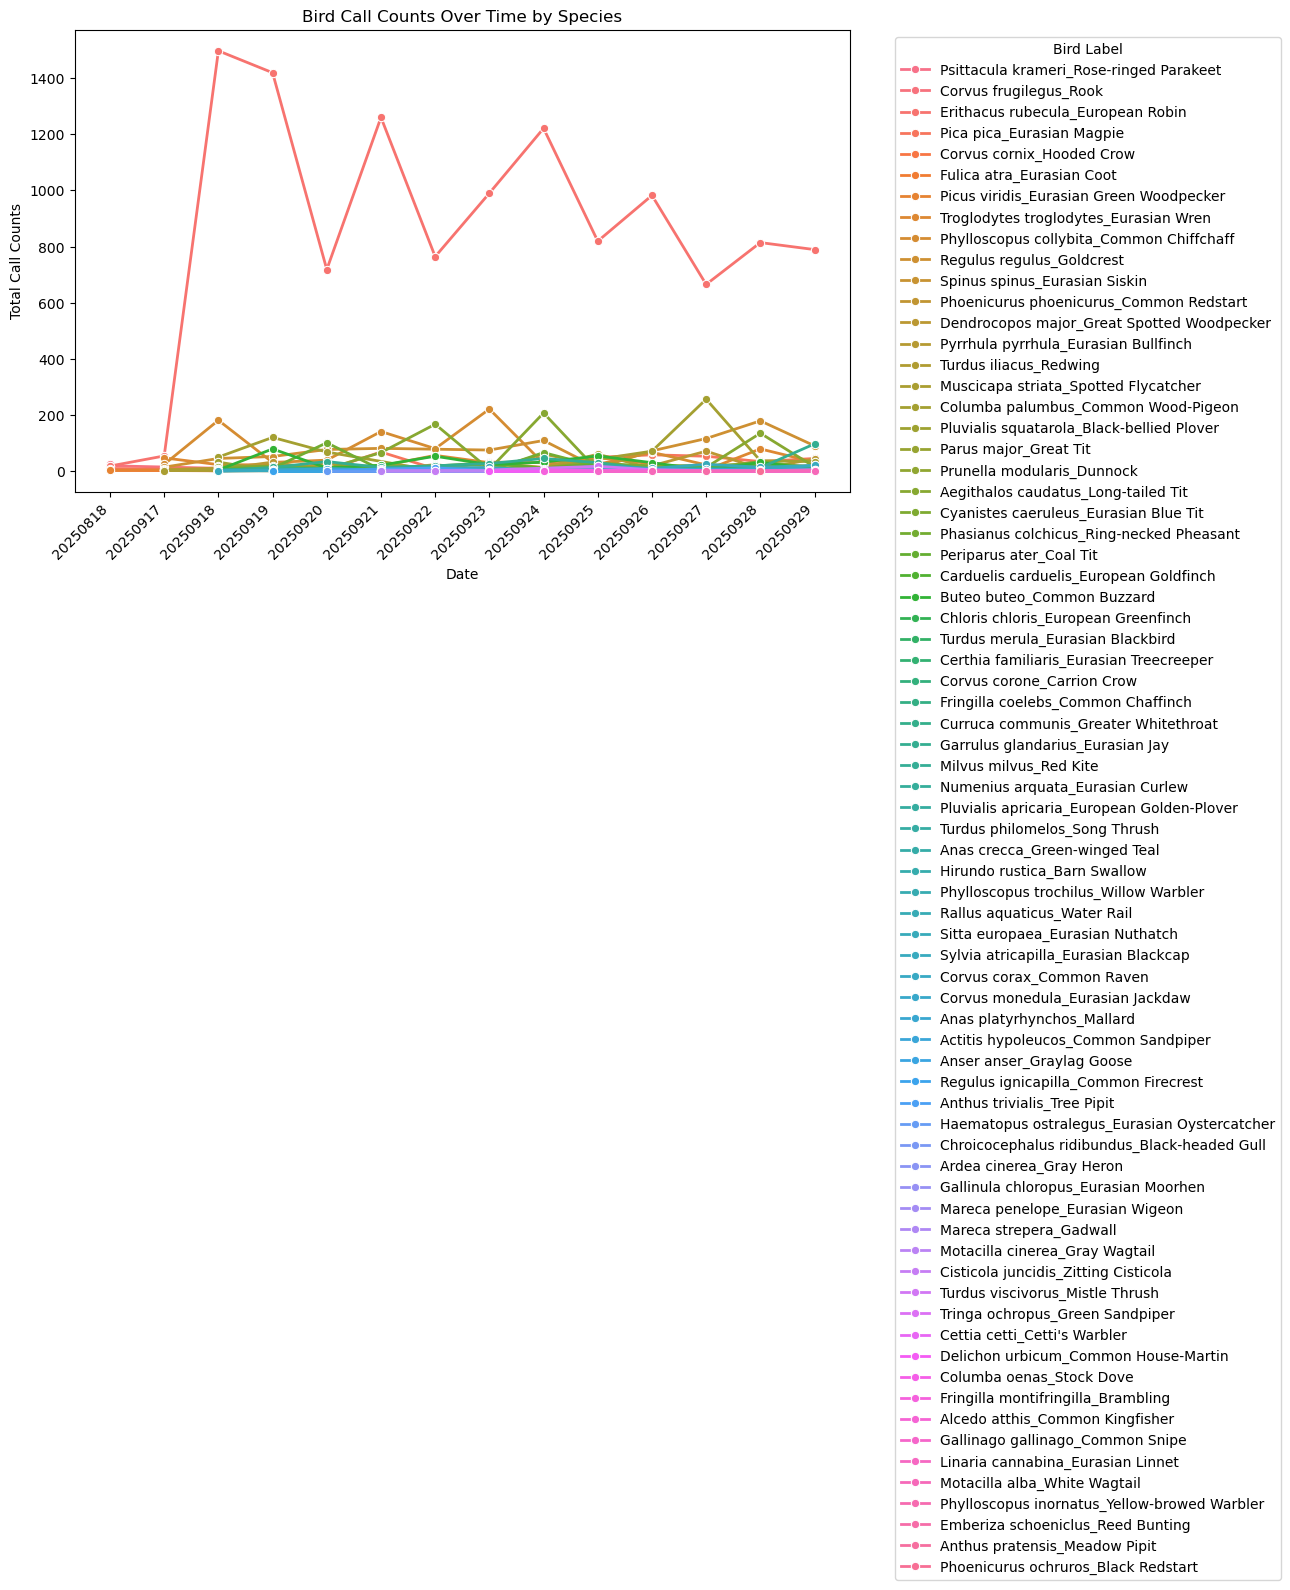

In [ ]:
## check out charts - with sns

#home_dir = os.path.expanduser('~')
#parquet_file_path = os.path.join(home_dir, 'Documents/MyProjects/NatureThrive', 'recordings_parquet/recordings_20251211.parquet') # parquet file
#df_stored_recordings = pd.read_parquet(parquet_file_path)

#df = df_stored_recordings[df_stored_recordings["confidence"]>0.75].groupby(by=["file_date","label"]).agg(call_counts=("scientific_name","count")).sort_values(by=["file_date","call_counts"], ascending=[True,False]).reset_index()

#print(df)

fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(
    data=df, 
    x='file_date', 
    y='call_counts', 
    hue='label', 
    ax=ax,
    linewidth=2,
    marker='o'
)
ax.legend(
    title='Bird Label',
    bbox_to_anchor=(1.05, 1), 
    loc='upper left'
)

plt.xticks(rotation=45, ha='right')
ax.set_title('Bird Call Counts Over Time by Species')
ax.set_ylabel('Total Call Counts')
ax.set_xlabel('Date')
plt.tight_layout(rect=[0, 0, 0.85, 1]) # Adjust layout to ensure the legend fits fully

plt.show()



In [ ]:
## look into using sqlite with pandas
import sqlite3


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed